# Exploring New Datasets

In this tutorial, we will look at the COVID-19 epidemiological dataset from Google Cloud Public Datasets. It is a set of free, publically available data hosted in BigQuery. Notice that for a given set of inputs, the weight_pounds (the label) can take many different values. 

This repository contains the largest COVID-19 epidemiological database available in addition to a powerful set of expansive covariates. It includes open sourced data with a permissive license (enabling commercial use) relating to vaccinations, epidemiology, hospitalizations, demographics, economy, geography, health, mobility, government response, weather, and more. Moreover, the data merges daily time-series from hundreds of data sources at a fine spatial resolution, containing over 20,000 locations and using a consistent set of region keys.



In [1]:
# These are all the modules that we will need for this lab. 
import numpy as np
import seaborn as sns
from google.cloud import bigquery

import matplotlib as plt
%matplotlib inline
import os
# As discussed in the class, you will have to create a free account on Google Cloud Platform, enable BigQuery API and create
# a credential file associated with your project. Save this file to your computer. Ensure that the file is in your operating
# systems search path. The name of your file may be different from gcp.json.

credential_path = "gcp.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [2]:
#Create a big query client
bq = bigquery.Client()

How many confirmed COVID-19 cases did each country have at the end of June?
This query determines the cumulative number of COVID-19 cases for each county, as well as a normalization of cumulative cases by country population, as of the end of June. 
https://console.cloud.google.com/bigquery?sq=1056986132837:0c435df9e5e145da81c06fa9f33e51fe

In [3]:
query = """
WITH
  country_pop AS (
  SELECT
    country_code AS iso_3166_1_alpha_3,
    year_2018 AS population_2018
  FROM
    `bigquery-public-data.world_bank_global_population.population_by_country`)
SELECT
  country_code,
  country_name,
  cumulative_confirmed AS june_confirmed_cases,
  population_2018,
  ROUND(cumulative_confirmed/population_2018 * 100,2) AS case_percent
FROM
  `bigquery-public-data.covid19_open_data.covid19_open_data`
JOIN
  country_pop
USING
  (iso_3166_1_alpha_3)
WHERE
  date = '2020-06-30'
  AND aggregation_level = 0
ORDER BY
  case_percent DESC
"""

In [4]:
#Convert the query to a dataframe so that other modules can use it
df = bq.query(query).to_dataframe()
df.head()

,country_code,country_name,june_confirmed_cases,population_2018,case_percent
0,QA,Qatar,97003.0,2781677.0,3.49
1,SM,San Marino,713.0,33785.0,2.11
2,BH,Bahrain,27414.0,1569439.0,1.75
3,CL,Chile,247914.0,18729160.0,1.32
4,KW,Kuwait,46940.0,4137309.0,1.13


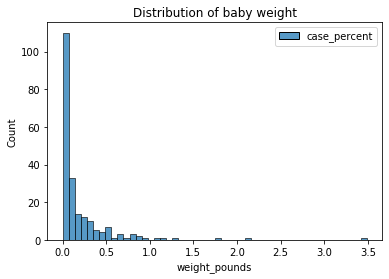

In [5]:
#Plot the baby weight to see the distribution
fig = sns.histplot(df[["case_percent"]])
fig.set_title("Distribution of baby weight")
fig.set_xlabel("weight_pounds")
fig.figure.savefig("weight_distrib.png")

How did confirmed COVID-19 cases compare to COVID-19 tests in the US during the month of June, by state?
This query determines the percent of reported COVID-19 tests in each US state that returned positive by dividing the total number of reported tests that returned positive by the total number of COVID-19 tests conducted in the month of June. 
https://console.cloud.google.com/bigquery?sq=1056986132837:c4ebc39e4be24f7685888eacf220e146

In [10]:
query="""
SELECT
  subregion1_code,
  subregion1_name,
  SUM(new_confirmed) as june_confirmed,
  SUM(new_tested) as june_tested,
  SUM(new_confirmed) / SUM(new_tested) AS positive_test_rate
FROM
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
  country_code = "US"
  AND aggregation_level = 1
  AND date BETWEEN '2020-06-01' AND '2020-06-30'
GROUP BY
  subregion1_code,
  subregion1_name 
ORDER BY
  positive_test_rate DESC
"""

In [8]:
# Task 3 0.5 points
# Add code here to do the following
# Create a new query for for the same parameters as in Cell 7, expect the plurality is equal to 2 (Twins). 
# Calculate and print the average weight_pounds for this cross section 
# Calculate and print the standard deviation for this cross section. 
